In [64]:
import glob
import numpy as np
import os

In [43]:
idx_train = glob.glob("./dataset/selfie/training/*.png")
idx_test = glob.glob("./dataset/selfie/testing/*.png")

In [44]:
partition = {}

train_path = "./dataset/selfie/training/"
test_path  = "./dataset/selfie/testing/"

IDs = []

for train_i in idx_train:
    train_ID = train_i.split("/")[-1]
    if 'matte' not in train_ID:
        IDs.append(os.path.join(train_path, train_ID))

for test_i in idx_test:
    test_ID = test_i.split("/")[-1]
    if 'matte' not in test_ID:
        IDs.append(os.path.join(test_path, test_ID))

IDs.sort()

In [45]:
# add supervisely dataset

In [46]:
len(IDs)

2000

In [47]:
IDs[:1]

['./dataset/selfie/testing/00001.png']

In [48]:
import os 
import glob
import cv2
import json
import matplotlib.pyplot as plt
import numpy as np 

dataset_path = "./dataset/Supervisely_person_dataset/"

In [49]:
os.listdir(dataset_path)

['.DS_Store',
 'ds6',
 'ds1',
 'ds8',
 'ds10',
 'ds11',
 'ds9',
 'ds7',
 'Readme.md',
 '.ipynb_checkpoints',
 'ds2',
 'ds5',
 'ds13',
 'ds12',
 'ds4',
 'ds3']

In [50]:
ds_list = sorted([os.path.join(dataset_path, p) for p in os.listdir(dataset_path) if "." not in p])

In [51]:
ds_list

['./dataset/Supervisely_person_dataset/ds1',
 './dataset/Supervisely_person_dataset/ds10',
 './dataset/Supervisely_person_dataset/ds11',
 './dataset/Supervisely_person_dataset/ds12',
 './dataset/Supervisely_person_dataset/ds13',
 './dataset/Supervisely_person_dataset/ds2',
 './dataset/Supervisely_person_dataset/ds3',
 './dataset/Supervisely_person_dataset/ds4',
 './dataset/Supervisely_person_dataset/ds5',
 './dataset/Supervisely_person_dataset/ds6',
 './dataset/Supervisely_person_dataset/ds7',
 './dataset/Supervisely_person_dataset/ds8',
 './dataset/Supervisely_person_dataset/ds9']

In [52]:
mask_machine_list = []

for ds in ds_list:
    mask_machine_list += [os.path.join(ds, "masks_machine", p) for p in os.listdir(os.path.join(ds, 'masks_machine'))]
    

In [53]:
mask_machine_list[:3]

['./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-541523_matte.png',
 './dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-395196_matte.png',
 './dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-588561_matte.png']

In [54]:
for ds in ds_list:

    IDs += [os.path.join(ds, "img", p) for p in os.listdir(os.path.join(ds, "img"))]

In [55]:
len(IDs)

7711

In [57]:
excluding = []
ks = []

for ID in IDs[2000:]:
    
    mask_ID = ID.split(".p")[0] + "_matte.png"

    if 'Supervisely' in mask_ID:
        mask_ID = mask_ID.replace("/img/", "/masks_machine/")
        mask_ID = mask_ID.replace(".jpeg", "")
        
    mask = cv2.imread(mask_ID, cv2.IMREAD_GRAYSCALE)
    
    if "Supervisely" in mask_ID:
        mask = mask * 255
    
    mask = cv2.resize(mask, (256,256))
    edge = cv2.Canny(mask, 50, 100)  
    
    k = np.int((mask[mask > 50].shape[0] / (256 * 256)) * 50)

    if k < 15:
        excluding.append(ID)
#         print(mask_ID)


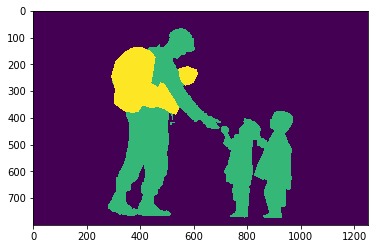

In [58]:
plt.imshow(cv2.imread("./dataset/Supervisely_person_dataset/ds1/masks_machine/soldier-military-uniform-american_matte.png", cv2.IMREAD_GRAYSCALE))

In [25]:
import seaborn as sns

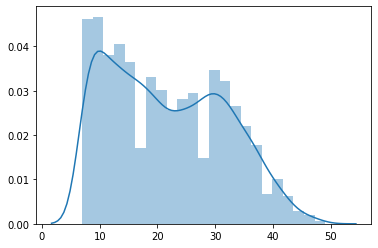

In [26]:
sns.distplot(ks)

In [59]:
len(excluding)

3703

In [60]:
## excluding small object images

for ex in excluding:
    IDs.remove(ex)

In [61]:
len(IDs), IDs

(4008,
 ['./dataset/selfie/testing/00001.png',
  './dataset/selfie/testing/00002.png',
  './dataset/selfie/testing/00003.png',
  './dataset/selfie/testing/00004.png',
  './dataset/selfie/testing/00005.png',
  './dataset/selfie/testing/00006.png',
  './dataset/selfie/testing/00007.png',
  './dataset/selfie/testing/00008.png',
  './dataset/selfie/testing/00009.png',
  './dataset/selfie/testing/00010.png',
  './dataset/selfie/testing/00011.png',
  './dataset/selfie/testing/00012.png',
  './dataset/selfie/testing/00013.png',
  './dataset/selfie/testing/00014.png',
  './dataset/selfie/testing/00015.png',
  './dataset/selfie/testing/00016.png',
  './dataset/selfie/testing/00017.png',
  './dataset/selfie/testing/00018.png',
  './dataset/selfie/testing/00019.png',
  './dataset/selfie/testing/00020.png',
  './dataset/selfie/testing/00021.png',
  './dataset/selfie/testing/00022.png',
  './dataset/selfie/testing/00023.png',
  './dataset/selfie/testing/00024.png',
  './dataset/selfie/testing/00025

#### Portrait dataset

In [15]:
# # save
# np.save("./dataset/img_paths.npy", IDs)

# img_paths = np.load("./dataset/img_paths.npy")

####  Include supervisely dataset

In [17]:
# save with supervisely dataset

# np.save("../dataset/img_paths_with_supervisely.npy", IDs)

# img_paths = np.load("../dataset/img_paths_with_supervisely.npy")

####  exclude small object images with threshold of k < 7

In [22]:
# save without wrong mask label

# np.save("./dataset/img_paths_with_supervisely_nosmallobject.npy", IDs)

# img_paths = np.load("./dataset/img_paths_with_supervisely_nosmallobject.npy")

####  exclude small object images with threshold of k < 15

In [63]:
# save without wrong mask label

# np.save("./dataset/img_paths_with_supervisely_nosmallobject_k15.npy", IDs)

# img_paths = np.load("./dataset/img_paths_with_supervisely_nosmallobject_k15.npy")

###  matting

In [81]:
base = "./dataset/Supervisely_person_dataset/"

dslist = [p for p in os.listdir("./dataset/Supervisely_person_dataset/") if "." not in p]

In [82]:
def change_scale(img_path):
    ori = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    return ori / 255

In [ ]:
for ds in dslist:
    ds_path = os.path.join(base, ds, "masks_machine")
    files = os.listdir(ds_path)
    
    for f in files:
        filename = os.path.join(ds_path, f)
        img = change_scale(filename)
        print(filename)
        cv2.imwrite(filename, img)
        print("file saved : ", os.path.exists(filename))

./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-110080_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-301276_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-175657_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-796023_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-540525_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-261841_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-357275_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-762041_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-459735_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-ph

./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-630834_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-718899_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-221246_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/jet-ski-water-sport-water-bike-water_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-274593_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-573557_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-351699_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-712143_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-605208_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_

./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-700700_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-248550_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-728842_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-747786_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-734217_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-594693_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-404995_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-546226_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-705063_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-ph

./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-632125_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-754733_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-775357_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-729937_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-670786_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/girls-portrait-sexual-excitement-model-45169_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/girl-baby-belly-blue-41271_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-235485_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/call-calling-cell-cellphone-41515_matte.png
file saved :  True
./dataset/Supervis

./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-746801_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-681644_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-287747_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-428328_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-371215_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-672362_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/sea-man-person-surfer_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-175703_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-755401_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-

file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-271821_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-689924_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-731367_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-761859_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/night-camera-photographer-canon-160644_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-458696_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/cooking-smoking-cigarette-kitchen_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-236973_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-531186_matte.png
file saved :  True
./dataset/Su

./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-729848_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-265316_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-206268_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-712433_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/fireman-firefighter-rubble-9-11-70573_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-102069_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-214011_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-206432_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-771317_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks

./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-245049_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-235512_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-695912_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/couch-conference-startup-bro-concentration_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-776450_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-446346_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-346794_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-206413_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-227288_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/

./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-213839_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-267977_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-118118_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-744790_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-447187_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-374809_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/woman-portrait-face-model-37846_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-769749_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-247597_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machi

./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-424706_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-810874_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-630293_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-274643_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-701739_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-424689_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-390660_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-679514_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-752812_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-ph

./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-274662_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-821026_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-580677_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-614510_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-247908_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-114798_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/high-jump-track-field-competition_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-206493_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-204496_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_mac

file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-744488_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-417473_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-442535_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-821045_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-106257_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-705122_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-112358_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-325862_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-816001_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/mask

./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-428543_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-833165_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-618542_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-61109_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-247203_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-681991_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-590488_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/advert-advertising-banner-blank-40991_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-175706_gXN0wAfdlf_matte.png
file saved :  True
./dataset/Supervisely_person_dataset

./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-518296_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-206339_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-185772_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-375801_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-209700_MiPgOBnAeQ_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-814197_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-532367_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-750894_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-262190_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machin

./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-700392_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-700447_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-818992_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-354963_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-638696_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-277012_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-437747_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-265607_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-157264_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-ph

file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-238366_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-784538_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-274661_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-376729_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-212410_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-346840_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-322033_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-413971_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/bored-female-girl-people-41321_matte.png
file saved :  True
./dataset/Supervisely_person_datas

file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-461792_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-760641_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-819398_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/audrey-hepburn-actress-breakfast-at-tiffany-s-prominent-76961_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-342359_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-714155_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-713069_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-746891_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-749072_matte.png
file saved :  True
./d

./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-256735_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-170294_bbtaokJxMx_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-265919_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-265714_MqDWEg78HW_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-816234_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-619949_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-68812_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-667523_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-573304_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/ma

file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-285977_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-746896_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-821529_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-716966_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-792833_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-267748_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/dive-diver-diving-mask-41509_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-343391_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/allergy-cold-disease-flu-41284_matte.png
file saved :  True
./dataset/Supervisely_per

file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-690782_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-206497_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-458730_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/fashion-person-woman-girl_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/grassland-portrait-college-students-young-woman-157934_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-670626_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-616382_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-819836_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-355070_NVHkTUQyFW_matte.png
file saved :

file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-69022_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/person-motor-racing-motorbike-motorcycle_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/kees-78004_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-346728_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/beauty-brunette-cute-equipment-41369_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/book-bored-college-education-41943_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-247853_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-139106_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-245241_nqhmPJpFTU_matte.png
file saved

file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-616384_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-207081_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-68917_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-432655_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-351330_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-138329_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-341520_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-690737_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-398078_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks

./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-746695_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-446342_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-458779_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/agent-business-call-center-41280_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-176102_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-551653_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-824544_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-616378_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-769775_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_mach

./dataset/Supervisely_person_dataset/ds6/masks_machine/beautiful-face-female-girl-41533_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-678492_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-818995_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/women-model-beauty-portrait_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-262399_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-386003_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-437740_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-546166_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/masks_machine/pexels-photo-279522_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds6/ma

file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/man-person-people-emotions_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/information-information-board-message-business-card-39604_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-236171_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-373289_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/woman-girl-freedom-happy-39853_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-217860_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/woman-bench-stand-by-blonde-157622_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-325531_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/child-children-girl-hap

./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-515169_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-303159_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-281417_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-274645_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/suit-business-man-business-man-37547_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-432722_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-716411_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-445109_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-366063_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_

./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-638700_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-259704_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/person-woman-apple-hotel_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-165907_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-276549_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-684387_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-681794_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-380769_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-207896_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexe

./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-346796_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-630837_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/nature-person-red-woman_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-326603_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-52608_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-395242_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-663437_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-314548_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-428339_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels

./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-206341_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-623079_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-93585_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-850395_UhSDCBvzBJ_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-460520_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-370037_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-374596_SkZ8QTb15Y_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-117755_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-761986_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/ma

./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-206499_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/girl-pose-sitting-smile-cute-56015_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-800212_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-137756_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-54202_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/girls-woman-female-beautiful-39653_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-839141_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/poses-female-education-posing-159708_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/bass-guitar-musician-instrument-guitarist-159260_matte.png
file sav

./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-800246_y1AjPNuEyH_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-745125_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-756565_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-681995_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-87585_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-610739_c4e87GckiU_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-735307_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-92323_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-240082_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/mas

file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-235497_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-853407_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-89526_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-247877_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/girl-lake-dress-white-160441_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-769584_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-833187_tIvBBw0xf2_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-104514_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-730413_matte.png
file saved :  True
./dataset/Supervisely_pers

./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-60682_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-705824_U8tze4GIJf_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-848542_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-620319_ncDX8u2Dak_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-669381_HdyQnaHrxX_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-793339_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-713486_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-405601_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-290622_matte.png
file saved :  True
./dataset/Supervisely_person_dat

file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-720363_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/studio-portrait-blond-blondie-girl-47736_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-139935_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/women-young-gorgeous-lying-47362_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-196667_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/ballet-dance-dancer-ballerina-39572_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-851956_RbwPPcKM22_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-413851_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-835907_matte.png
fil

./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-91627_KnkS6iyscK_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-792695_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-416747_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-825860_wyhja5jIzr_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-759589_j7z49vP2NG_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-45924_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/woman-confident-happy-confident-woman-157741_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-531162_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/kisses-girl-blow-kisses-blowing_matte.png
file saved :  T

./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-850392_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-271721_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-751237_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-289227_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/woman-smartphone-girl-bus_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-207857_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-156051_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-578284_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-89643_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexe

file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-192440_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-432550_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-532301_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-676629_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-776552_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-206457_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-206543_ridJMC97dj_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-206410_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-320005_matte.png
file saved :  True
./dataset/Supervisely_person_datas

file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-234790_6HBfcSrNvW_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-775910_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-156937_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-104510_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-186263_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-852858_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/sunglasses-white-dress-fashion-model-157887_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-375899_6qAdckIjiW_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-113699_matte.png
file saved :  True

file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/woman-young-sport-of-course-157946_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-784370_QtnJTsg4iX_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-28054_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-91471_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-105061_j6nS0jFB30_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-764872_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-325878_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/girl-indian-red-oriental-160585_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-716421_matte.png
file saved :  Tru

file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-386139_Dx5vukbFIO_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-235469_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-68468_yhjNABaEZ8_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/young-woman-pretty-shooting-157717_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/girl-cat-kitten-fashion_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-304807_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-206348_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-206454_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-220426_matte.png
file saved :  True
./dat

./dataset/Supervisely_person_dataset/ds8/masks_machine/model-photography-louise-wilma_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/apples-woman-pretty-fall_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-267112_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-185939_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-818805_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-413805_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-235456_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-852854_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-735839_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_m

./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-813279_bmr3Tk7lRt_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-413993_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-270775_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-247327_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-371122_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-300964_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-231061_S7fDMOUt9u_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-840802_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/black-and-white-woman-girl-sitting_matte.png
file saved :  True
./dataset/Supervisely_perso

file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-111118_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-297376_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-768108_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-156160_99iujaI499_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-365341_vdsxc6NuVb_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-803985_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-206436_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-813247_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-586337_matte.png
file saved :  True
./dataset/Supervisely_p

file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/softball-girls-softball-outfielder-sports-159648_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/fashion-woman-girl-jacket_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-848522_F4PtiTA9ZP_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-698503_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-209941_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-photo-208176_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pylon-flight-girl-model-163469_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/beautiful-business-smartphone-cell-phone-41546_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds8/masks_machine/pexels-pho

./dataset/Supervisely_person_dataset/ds10/masks_machine/pexels-photo-687782_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds10/masks_machine/pexels-photo-345045_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds10/masks_machine/pexels-photo-879808_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds10/masks_machine/pexels-photo-864895_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds10/masks_machine/pexels-photo-865908_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds10/masks_machine/pexels-photo-865924_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds10/masks_machine/pexels-photo-237354_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds10/masks_machine/thailand-costume-girl-woman-157857_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds10/masks_machine/pexels-photo-860491_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds1

file saved :  True
./dataset/Supervisely_person_dataset/ds11/masks_machine/pexels-photo-189857_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds11/masks_machine/pexels-photo-691400_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds11/masks_machine/pexels-photo-859194_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds11/masks_machine/pexels-photo-234166_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds11/masks_machine/pexels-photo-878680_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds11/masks_machine/girl-beautiful-beautiful-girl-face_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds11/masks_machine/pexels-photo-421879_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds11/masks_machine/pexels-photo-871055_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds11/masks_machine/pexels-photo-717208_matte.png
file saved :  True
./dataset/Supervisely

./dataset/Supervisely_person_dataset/ds11/masks_machine/pexels-photo-207884_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds11/masks_machine/pexels-photo-881583_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds11/masks_machine/pexels-photo-880470_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds11/masks_machine/girl-kids-training-school-159782_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds11/masks_machine/pexels-photo-242148_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds11/masks_machine/pexels-photo-789403_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds11/masks_machine/pexels-photo-867525_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds11/masks_machine/pexels-photo-698925_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds11/masks_machine/pexels-photo-301950_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds11/

./dataset/Supervisely_person_dataset/ds9/masks_machine/human-people-singapore-couple-79690_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds9/masks_machine/pexels-photo-876714_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds9/masks_machine/pexels-photo-881633_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds9/masks_machine/pexels-photo-869516_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds9/masks_machine/pexels-photo-878716_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds9/masks_machine/pexels-photo-881638_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds9/masks_machine/pexels-photo-879474_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds9/masks_machine/pexels-photo-874283_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds9/masks_machine/pexels-photo-279357_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds9/masks_m

file saved :  True
./dataset/Supervisely_person_dataset/ds9/masks_machine/pexels-photo-872756_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds9/masks_machine/pexels-photo-883441_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds9/masks_machine/pexels-photo-872432_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds9/masks_machine/pexels-photo-879589_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds9/masks_machine/pexels-photo-874242_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds9/masks_machine/pexels-photo-859191_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds9/masks_machine/pexels-photo-873418_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds9/masks_machine/pexels-photo-864994_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds9/masks_machine/pexels-photo-884417_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds9/mask

./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-837443_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-211043_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/american-football-running-back-runner-football-159662_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-248571_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/peasant-rice-fields-rice-crops-colombia-50715_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-205070_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-845437_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/hammer-throw-athlete-track-and-field-training-37636_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/boy-winter-snow-smoke

file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-168988_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-844520_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-673539_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-458726_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-842532_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-247848_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-690903_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-167638_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-226473_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/mask

./dataset/Supervisely_person_dataset/ds7/masks_machine/bagpipes-highlander-man-human-63248_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-274711_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/traffic-paper-news-man-597048_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-175759_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-695914_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-842070_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-277055_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-669277_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-738033_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/d

./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-88654_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-416047_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-695893_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-722752_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-564104_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/football-american-football-game-sport-163525_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-234610_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-192470_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-843561_matte.png
file saved :  True
./dataset/Supervisely_person_dataset/ds7